In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Oscilador Torsional/Torque Magnético - Oscilador Torsional.xlsx"
data = pd.read_excel(data)
print(data)

    Corriente (Amperios)  Posición de equlibrio (Rad)
0                  -0.25                         2.82
1                  -0.50                         2.68
2                  -0.75                         2.54
3                  -1.00                         2.42
4                  -1.25                         2.32
5                  -1.50                         2.24
6                  -1.75                         2.18
7                  -2.00                         2.12
8                   0.25                         3.18
9                   0.50                         3.32
10                  0.75                         3.46
11                  1.00                         3.58
12                  1.25                         3.66
13                  1.50                         3.72
14                  1.75                         3.82
15                  2.00                         3.86


In [31]:
x,y= np.array(data['Corriente (Amperios)']), np.array((data['Posición de equlibrio (Rad)'])-3.004)/np.cos(np.array(data['Posición de equlibrio (Rad)']-3.004))

In [32]:
np.cos(np.array(data['Posición de equlibrio (Rad)']))

array([-0.94873322, -0.89534431, -0.82443529, -0.7507546 , -0.68105588,
       -0.62036161, -0.57221457, -0.52200818, -0.99926253, -0.98412758,
       -0.94973521, -0.90542889, -0.86860944, -0.8373344 , -0.77857318,
       -0.75285495])

In [33]:
x,y

(array([-0.25, -0.5 , -0.75, -1.  , -1.25, -1.5 , -1.75, -2.  ,  0.25,
         0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ]),
 array([-0.1871593 , -0.34178313, -0.51885922, -0.70001833, -0.88252219,
        -1.05806252, -1.21302916, -1.39418301,  0.17876152,  0.33246147,
         0.50789627,  0.6868197 ,  0.82782463,  0.94905176,  1.1909969 ,
         1.30594588]))

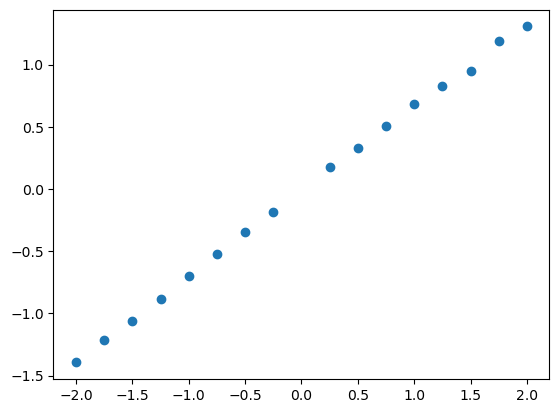

In [34]:
plt.scatter(x, y)

In [35]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*t+b,  x,y)
incert =np.sqrt(np.diag(cov))

In [36]:
param, incert

(array([ 0.68005551, -0.01974117]), array([0.00454649, 0.00573966]))

In [43]:
X=np.linspace(min(x), max(x), 1000)
Y=param[0]*X+param[1]

Text(0.5, 1.0, 'Regresión Lineal-Corriente (A) vs. Posicón Angular (rad)')

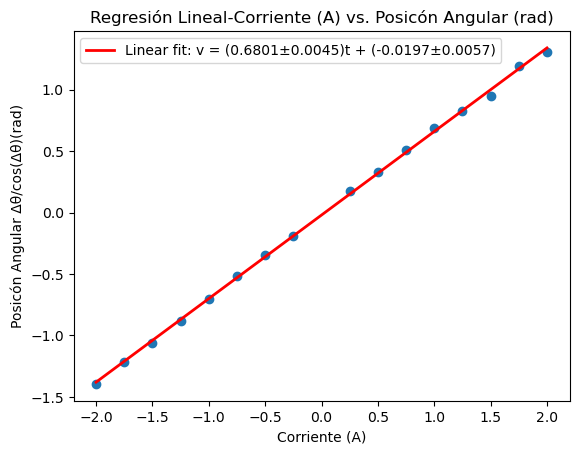

In [47]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(X, Y, color='red', linewidth=2, 
        label=f'Linear fit: v = ({np.round(param[0], 4)}±{np.round(incert[0],4)})t + ({np.round(param[1],4)}±{np.round(incert[1],4)})')
#plt.legend(['Regresión Lineal: Intercepto '])
ax.legend(loc='upper left')
ax.set_xlabel('Corriente (A)')
ax.set_ylabel('Posicón Angular Δθ/cos(Δθ)(rad)')
ax.set_title('Regresión Lineal-Corriente (A) vs. Posicón Angular (rad)')